# <font color=darkcyan>  Introduction and application to dimension reduction in Python </font>

### <font color=darkred>  Generate random numbers with NumPy </font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

- Arrays of random numbers are generated with the ``rand()`` NumPy function.
``rand()`` takes the the size of the array as an argument.

- Arrays of random integers are generated using the ``randint()`` NumPy function.
``randint()`` has three arguments, the lower end of the range, the upper end of the range, and the number of integer values to generate.

- Arrays of standard Gaussian random values are generated using the ``randn()`` NumPy function.
``randn()`` takes the the size of the array as an argument.

Additional information on random sampling with NumPy here: https://numpy.org/doc/1.16/reference/routines.random.html

**Do not hesitate to try other distributions and understand the arguments of all functions**.

<font color=darkred>
    
- Generate 10 random numbers from the previous distributions: uniform in (0,1), uniform in {0,...,10}, standard Gaussian. 
    
- Generate 10 random numbers from a Gaussian distribution with mean 1 and variance 2.
</font>

In [3]:
n= 10 
values_uni = np.random.rand(n)
print(values_uni)
values_int = np.random.randint(0,11,n)
print(values_int)
values_norm = np.random.randn(n)
print(values_norm)

[0.85977512 0.01543075 0.82319341 0.36649623 0.1046997  0.49637384
 0.27258948 0.5299277  0.10013143 0.64175958]
[ 1  5 10  6  0  0  8  2  2  5]
[-0.7833647   0.99485447 -0.62872779 -0.80769768 -1.13421574 -0.48821286
 -1.71985497 -1.00044331 -1.26779932  1.26768407]


In [4]:
values_norm_1_2= 1+ 2*np.random.randn(n)
print(values_norm_1_2)

[ 0.75012353  3.33544613 -0.10198814  1.49895757  3.5675858   1.21080335
 -1.87365586  1.33025683  1.73519825 -3.13472277]


You can also sample multivariate normal with ``np.random.multivariate_normal``

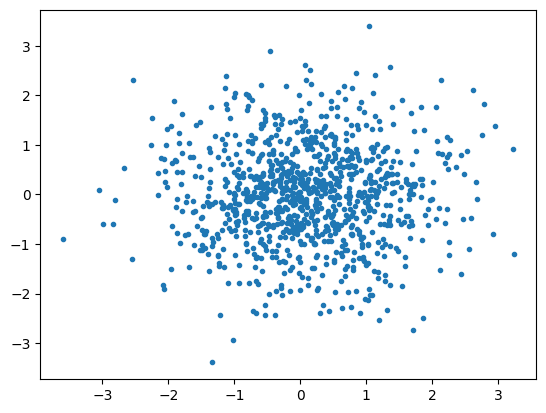

In [5]:
m = [0, 0]
Sigma = [[1, 0], [0, 1]]
n = 1000
# Sample n Gaussian random variables with mean m and variance matrix Sigma 
x, y = np.random.multivariate_normal(m, Sigma, n).T
plt.plot(x, y, '.')
plt.show()

<font color=darkred>
    
- Generate 500 Gaussian random variables with mean $(-1,1)$ and variance $\begin{pmatrix}2 & 0.5 \\ 0.5 & 1\end{pmatrix}$.
    
</font>

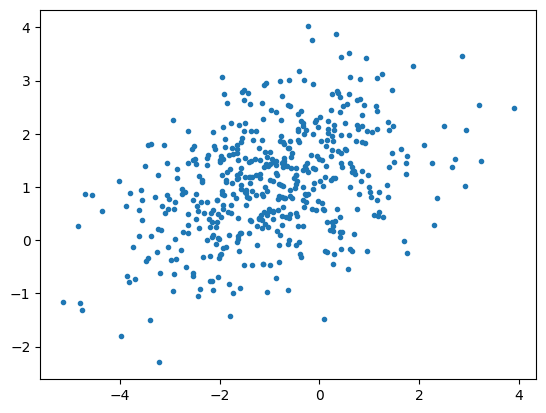

In [13]:
n= 500
mu =[-1,1]
sigma = [[2,0.5],[0.5,1]]
x,y =np.random.multivariate_normal(mu,sigma,n).T

plt.plot(x,y,'.')

You can also have a look at ``scipy.stats`` https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats
This is a module containing many probability distributions and functions very useful in statistics and applied probability.

### <font color=darkred> Arrays/list/tuples syntax in Python </font>

https://numpy.org/doc/stable/reference/generated/numpy.array.html

NumPy arrays can be defined using lists [...] and tuples (...)

In [14]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
#If we want to access index 3 and 4 
x[2:4]

In [ ]:
#If we want to access all elements except the last one
x[:-1]

In [ ]:
#If we want to access all elements except the two last ones
x[:-2]

In [ ]:
#If we want to revert the order of the elements
x[::-1]

We can also build arrays with any dimension by specifying how many dimensions and length along that dimension in a tuple or list. This can be done for instance using ``np.zeros`` or ``np.ones``.

In [ ]:
np.zeros((4, 3, 2))

In [ ]:
np.ones((2, 2, 5))

We can also reshape an array using the function ``np.reshape`` (https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

<font color=darkred>
   Convert the following 1D array to a 2D array with two rows.
</font>

In [15]:
x = np.arange(20)
x = np.reshape(x,(2,10))
print(x)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]


The ``np.dot`` function computes the dot product between two arrays. 
If both arrays are one-dimensional, it computes the inner product of vectors.
If both arrays are two-dimensional, it computes the matrix multiplication. But it extends dot product to higher-dimensional arrays.
https://numpy.org/doc/stable/reference/generated/numpy.dot.html

In [16]:
x = [[1, 0], [0, 1]]
y = [[2, 2], [0, 3]]
np.dot(x, y)

array([[2, 2],
       [0, 3]])

<font color=darkred>
    Compute the product between  $\begin{pmatrix}2 & 0.5 \\ 0.5 & 1\end{pmatrix}$ and  $\begin{pmatrix}3 & 1 & 0\\ 1 & 1 & 1\end{pmatrix}$.
</font>

### <font color=darkred>  Singular Value Decomposition </font>

The Singular Value Decomposition (SVD) states that for all $\mathbb{R}^{n \times d}$ matrix $A$ with rank $r$, there exist $\sigma_1\geqslant \ldots \geqslant \sigma_r>0$ such that
$$
A = \sum_{k=1}^r \sigma_k u_k v_k'\,,
$$
where $\{u_1,\ldots,u_r\}\in (\mathbb{R}^n)^r$ and $\{v_1,\ldots,v_r\}\in (\mathbb{R}^d)^r$ are two orthonormal families. The vectors $\{\sigma_1,\ldots,\sigma_r\}$ are called singular values of $A$ and $\{u_1,\ldots,u_r\}$ (resp. $\{v_1,\ldots,v_r\}$) are the left-singular (resp. right-singular) vectors of $A$.


1. If $U$ denotes the $\mathbb{R}^{n\times r}$ matrix with columns given by $\{u_1,\ldots,u_r\}$ and $V$ denotes the $\mathbb{R}^{p \times r}$ matrix with columns given by $\{v_1,\ldots,v_r\}$, then the singular value decomposition of $A$ may also be written as
$$
A = UD_rV'\,,
$$
where $D_r = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$.


2. The singular value decomposition is closely related to the spectral theorem for symmetric semipositive definite matrices. In the framework of this practical session, $A'A$ and $AA'$ are positive semidefinite such that
$$
A'A = VD_r^2V'\quad\mathrm{and}\quad AA' = UD_r^2U'\,.
$$

The numpy.linalg.svd function can be used in Python to compute the SVD of a given matrix. The output of this function are:
1. $U$ has left singular vectors in the columns ;
2. sigma is rank 1 numpy array with singular values ;
3. $V$ has right singular vectors in the rows.

In [17]:
# ignore warnings for better clarity (may not be the best thing to do)...
import warnings
warnings.filterwarnings('ignore')

In [18]:

# Image.open is used to open the input picture (with any .jpg or .png)
img = Image.open('./seals.jpg')
img

FileNotFoundError: [Errno 2] No such file or directory: './seals.jpg'

In [ ]:
# Image converted into a numpy array or matrix
img_mat       = np.array(list(img.getdata(band=0)), float)
img_mat.shape = (img.size[1], img.size[0])
img_mat       = np.matrix(img_mat)
# SVD can then be applied to the matrix img_mat
img_mat

<font color=darkred>
    Use the ``np.linalg.svd`` function to compute the SVD of img_mat
</font>

https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [ ]:
# Perform Singular Value Decomposition


<font color=darkred>
    Perform image reconstruction using only k = 10 singular values. Display several reconstruction using different values of k.
</font>

In [ ]:
# Image reconstruction
k = 10



<font color=darkred>
    Write a function with input the path of an image "path_image" and an integer "k" and return in gray scale the reconstructed picture with the first k singular values
</font>

In [5]:
from PIL import Image

def svd_decomposition(path_image,k):

    img = Image.open(path_image)
    img_mat = np.array(list(img.getdata(band=0)), float)
    img_mat.shape = (img.size[1], img.size[0])
    img_mat       = np.matrix(img_mat)
    U, sigma, V = np.linalg.svd(img_mat)

    reconstimg = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    plt.imshow(reconstimg, cmap='gray')
    plt.axis('off')


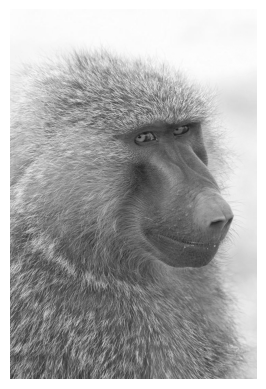

In [9]:
svd_decomposition('babouin.jpg',600)

### <font color=darkred>  Principal Component Analysis </font>

#### <font color=darkred>Application of the SVD to Principal Component Analysis</font>

Let $(X_i)_{1\leqslant i\leqslant n}$ be i.i.d. random variables in $\mathbb{R}^d$ and consider the matrix $X\in\mathbb{R}^{n\times d}$ such that the $i$-th row of $X$ is the observation $X'_i$. Let $\Sigma_n$ be the empirical covariance matrix (data are assumed to be centered for simplicity, this can be done manually):
$$
\Sigma_n = n^{-1}\sum_{i=1}^n X_i X'_i\,.
$$
Principal Component Analysis  aims at reducing the dimensionality of the observations $(X_i)_{1\leqslant i \leqslant n}$ using a "compression" matrix $W\in \mathbb{R}^{p\times d}$ with $p\leqslant d$ so that for each $1\leqslant i \leqslant n$, $WX_i$ ia a low dimensional representation of $X_i$. The original observation may then be partially recovered using another matrix $U\in \mathbb{R}^{d\times p}$. Principal Component Analysis computes $U$ and $W$ using the least squares approach:
$$
(U_{\star},W_{\star}) \in \hspace{-0.5cm}\underset{(U,W)\in \mathbb{R}^{d\times p}\times \mathbb{R}^{p\times d}}{\mathrm{argmin}} \;\sum_{i=1}^n\|X_i - UWX_i\|^2\,, 
$$

Let $(U_{\star},W_{\star})\in \mathbb{R}^{d\times p}\times \mathbb{R}^{p\times d}$ be a solution to this problem. Then, it can be proved that the columns of $U_{\star}$ are orthonormal and $W_{\star} = U_{\star}'$. Therefore, solving the optimization problem boils down to computing
$$
U_{\star} \in \hspace{-0.5cm}\underset{U\in \mathbb{R}^{d\times p}\,,\, U'U = I_n}{\mathrm{argmax}} \hspace{-.4cm}\{ \mathrm{trace}(U'\Sigma_nU)\}\,.
$$
Let $\{\vartheta_1,\ldots,\vartheta_d\}$ be orthonormal eigenvectors associated with the eigenvalues $\lambda_1\geqslant \ldots \geqslant \lambda_d$ of $\Sigma_n$. Then a solution is given by the matrix $U_{\star}$ with columns $\{\vartheta_1,\ldots,\vartheta_p\}$ and $W_{\star} = U_{\star}'$.

#### <font color=darkred>Principal Component Analysis as an optimization problem</font>

For any dimension $1\leqslant p \leqslant  d$, let $\mathcal{F}_d^p$ be the set of all vector suspaces of $\mathbb{R}^d$ with dimension $p$. Principal Component Analysis computes a linear span $V_d$ such as
$$
V_p \in \underset{V\in \mathcal{F}_d^p}{\mathrm{argmin}} \;\sum_{i=1}^n\|X_i - \pi_V(X_i)\|^2\,, 
$$
where $\pi_V$ is the orthogonal projection onto the linear span $V$. Consequently, $V_1$ is a solution if and only if $v_1$ is solution to:
$$
v_1 \in \underset{v \in \mathbb{R}^d\,;\, \|v\|=1}{\mathrm{argmax}} \sum_{i=1}^n   \langle X_i, v \rangle^2\,.
$$
For all $2\leqslant p \leqslant d$, following the same steps, it can be proved that  a solution is given by $V_p = \mathrm{span}\{v_1, \ldots, v_p\}$ where
$$
v_1 \in \underset{v\in \mathbb{R}^d\,;\,\|v\|=1}{\mathrm{argmax}} \sum_{i=1}^n\langle X_i,v\rangle^2 \quad\mbox{and for all}\;\; 2\leqslant k \leqslant p\;,\;\; v_k \in \underset{\substack{v\in \mathbb{R}^d\,;\,\|v\|=1\,;\\ v\perp v_1,\ldots,v\perp v_{k-1}}}{\mathrm{argmax}}\sum_{i=1}^n\langle X_i,v\rangle^2\,. 
$$

As $V_p = \mathrm{span}\{\vartheta_1, \ldots, \vartheta_p\}$, for all $1\leqslant i\leqslant n$,
$$
\pi_{V_p}(X_i) = \sum_{k=1}^p \langle X_i,\vartheta_k\rangle \vartheta_k  = \sum_{k=1}^p (X'_i \vartheta_k)\vartheta_k = \sum_{k=1}^p c_k(i)\vartheta_k\,,
$$
where for all $1\leqslant k \leqslant p$, the $k$-th principal component is defined as $c_k = X\vartheta_k$. Therefore the $k$-th principal component is the vector whose components are the coordinates of each $X_i$, $1\leqslant i\leqslant n$, relative to the basis $\{\vartheta_1, \ldots, \vartheta_p\}$ of $V_p$.

Using Pyplot, the ``scatter()`` function allows to draw a scatter plot.
It plots one dot for each observation. It needs two arrays of the same length, one for the values of the x-axis, and one for values on the y-axis.
Additional arguments and options about scatter plots can be found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

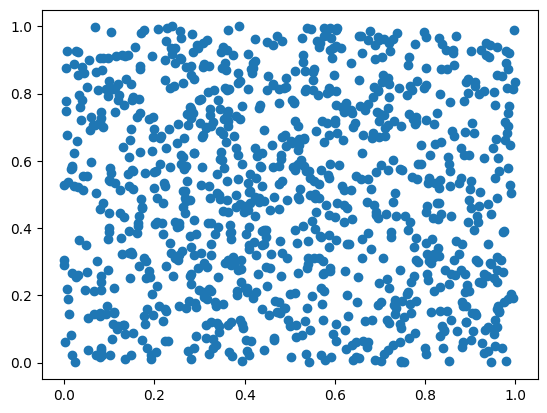

In [6]:
n= 1000
x_values = np.random.rand(n)
y_values = np.random.rand(n)
plt.scatter(x_values,y_values)

<font color=darkred>
    Using the ``np.dot`` function, compute the product of a 2x2 matrix containing standard Gaussian random numbers with a 2x200 matrix containing standard Gaussian random numbers. Compute the transpose of this matrix.
</font>

 See  https://numpy.org/doc/stable/reference/generated/numpy.dot.html for additional details

In [7]:
A = np.random.normal(0,1,[2,2])
B = np.random.normal(0,1,[2,200])
X= np.dot(A,B).T
print(X)

[[ 6.11380130e-01 -5.08692367e-01]
 [ 1.29391517e+00  1.65432803e+00]
 [ 1.29780073e+00  2.58128520e+00]
 [-4.34004717e-01 -5.96626185e-01]
 [ 2.44923292e+00  1.99440779e+00]
 [-1.36657846e+00 -4.60728101e+00]
 [-1.00857139e+00  2.37296361e-01]
 [-2.13900734e+00  4.68762278e-01]
 [-1.93795225e+00 -2.36307111e+00]
 [-2.05325201e-01 -1.06593747e+00]
 [ 4.85744357e+00  2.24231836e+00]
 [ 8.32282922e-02 -1.08272596e+00]
 [ 1.23048465e+00 -1.65573992e-01]
 [-3.08275219e+00 -2.92962009e+00]
 [ 3.01164872e+00  2.67250163e+00]
 [-2.44432372e-01 -6.19003711e-01]
 [-2.63335323e-01 -1.61469005e+00]
 [ 3.80160751e-01 -2.78185069e-01]
 [-5.54252851e-01 -8.62933853e-01]
 [ 2.77008445e+00  2.22954061e+00]
 [-2.13996796e+00 -2.08673799e+00]
 [ 6.48524749e-01 -1.22649924e+00]
 [-7.58984837e-01  9.81939853e-01]
 [-2.78997211e+00 -3.59417534e+00]
 [ 4.35053010e-01 -1.03084673e+00]
 [ 1.84004413e-02  2.82137350e+00]
 [ 2.31664897e+00  1.28127588e+00]
 [ 1.53224621e-01  1.10287381e+00]
 [ 1.04020389e+00 -3

<font color=darkred>
    Use a scatter plot to display the second column of the matrix as a function of the first column.
</font>

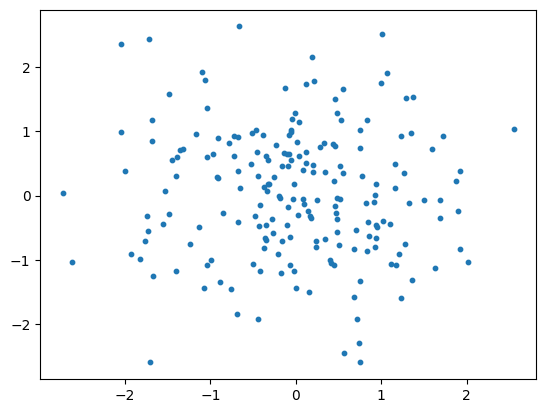

In [8]:
plt.scatter(B.T[:,0],B.T[:,1],s=10)

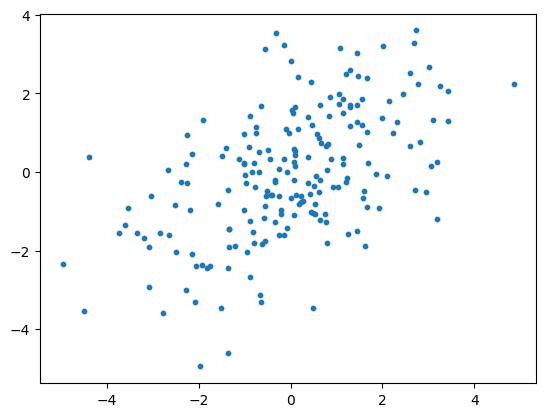

In [9]:
plt.scatter(X[:,0],X[:,1],s=10)

<font color=darkred>
    We have a dataset of n=200 points in dimension 2. We want to use a PCA to project data in a one dimensional space. Perform a PCA with one component using PCA(n_components=1) and the function fit.
</font>

See https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html for additional details

In [36]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

We can display several outputs of the PCA 

In [37]:
print('The principal component is:')
print(pca.components_)

print('The explained variance is %g'%pca.explained_variance_)
print('The associated singular value is %g'%pca.singular_values_)

The principal component is:
[[0.96684172 0.25537635]]
The explained variance is 6.30963
The associated singular value is 35.4347


C:\Users\tapri\AppData\Local\Temp\ipykernel_6640\1317565691.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('The explained variance is %g'%pca.explained_variance_)
C:\Users\tapri\AppData\Local\Temp\ipykernel_6640\1317565691.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('The associated singular value is %g'%pca.singular_values_)


In [38]:
# Apply the dimensionality reduction on X
# X_pca contains the coordinates of each data in the space generated by the principal components
X_pca = pca.transform(X)
# in this case pca.components_[k] contains the coordinates of the k-th principal component in
# the original space (here the usual Euclidian plane). In a general case pca.components_[k] is a 
# d-dimensional vector.
# X_pca[i] contains the coordinates of the i-th data in the vector space generated by the principal 
# components.
# Therefore, X_pca[i] is a vector with n_components entries. 

In a general case, when $\mathrm{n\_components} = p$ for all $1\leqslant i\leqslant n$ and all $1\leqslant k \leqslant p$, the
projection of $X_i$ in the space generated by the principal components is:

$$
\pi_{V_p}(X_i) = \sum_{k=1}^{p}X_{\mathrm{pca}}[i]_k \times \mathrm{pca.components\_}[k]\,.
$$

<font color=darkred>
Transform the reduced data set X_pca in the original space using ``pca.inverse_transform`` to build X_inverse. 
    
Use a scatter plot to display X and X_inverse on the same plot.
</font>

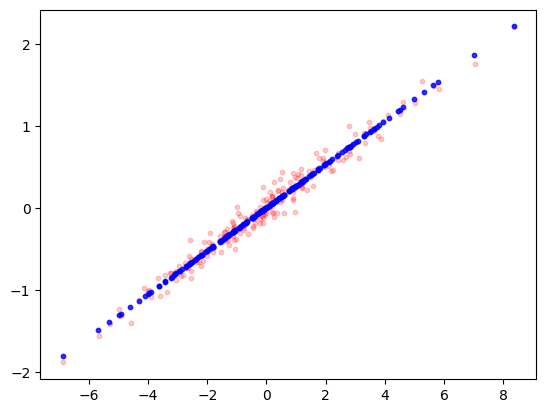

In [41]:
# transform the reduced data set in the original space
# X_inverse[i,:] contains the coordinates of the projection of Xi in the original space

X_inverse = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, s=10,c='r')
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], alpha=0.8, s=10,c='b')

In [1]:
A

NameError: name 'A' is not defined